In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# for column in df1.columns:
#   if column != 'MSA' and column != 'PopChange':
#     df1[column] = df1[column]>=df1[column].median()

In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm, metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#Load Data
msa_data = pd.read_csv('/content/drive/MyDrive/MLC Final Project/4_MSA_LQ.csv')
pop_data = pd.read_csv('/content/drive/MyDrive/MLC Final Project/1_PopChange_10_16.csv')
income_data = pd.read_csv('/content/drive/MyDrive/MLC Final Project/2_Income_Incr_10_16.csv')
emp_data = pd.read_csv('/content/drive/MyDrive/MLC Final Project/3_Emp_Incr_10_16.csv')

In [ ]:
#RFC with to MSA classification, and 5 category classifications

In [ ]:
pop_data['PopCategory'] = -100
for i in range(len(pop_data)):
  if ((pop_data['PopChange'][i] <= 0.5) & (pop_data['PopChange'][i] > -0.5)):
    pop_data['PopCategory'][i] = 0
  elif ((pop_data['PopChange'][i] > 0.5) & (pop_data['PopChange'][i] <= 1)):
    pop_data['PopCategory'][i] = 1
  elif (pop_data['PopChange'][i] > 1):
    pop_data['PopCategory'][i] = 2
  elif ((pop_data['PopChange'][i] < -0.5) & (pop_data['PopChange'][i] >= -1)):
    pop_data['PopCategory'][i] = -1
  elif (pop_data['PopChange'][i] < -1):
    pop_data['PopCategory'][i] = -2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/py

In [ ]:
income_data['incomeCategory'] = -100
for i in range(len(income_data)):
  if ((income_data['IncomeChange'][i] <= 0.5) & (income_data['IncomeChange'][i] > -0.5)):
    income_data['incomeCategory'][i] = 0
  elif ((income_data['IncomeChange'][i] > 0.5) & (income_data['IncomeChange'][i] <= 1)):
    income_data['incomeCategory'][i] = 1
  elif (income_data['IncomeChange'][i] > 1):
    income_data['incomeCategory'][i] = 2
  elif ((income_data['IncomeChange'][i] < -0.5) & (income_data['IncomeChange'][i] >= -1)):
    income_data['incomeCategory'][i] = -1
  elif (income_data['IncomeChange'][i] < -1):
    income_data['incomeCategory'][i] = -2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: Sett

In [ ]:
emp_data['empCategory'] = -100
for i in range(len(emp_data)):
  if ((emp_data['EmpChange'][i] <= 0.5) & (emp_data['EmpChange'][i] > -0.5)):
    emp_data['empCategory'][i] = 0
  elif ((emp_data['EmpChange'][i] > 0.5) & (emp_data['EmpChange'][i] <= 1)):
    emp_data['empCategory'][i] = 1
  elif (emp_data['EmpChange'][i] > 1):
    emp_data['empCategory'][i] = 2
  elif ((emp_data['EmpChange'][i] < -0.5) & (emp_data['EmpChange'][i] >= -1)):
    emp_data['empCategory'][i] = -1
  elif (emp_data['EmpChange'][i] < -1):
    emp_data['empCategory'][i] = -2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: Sett

In [ ]:
df_std = msa_data.merge(pop_data[['msaID','PopChange', 'PopCategory']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)
df_std2 = msa_data.merge(income_data[['msaID','IncomeChange', 'incomeCategory']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)
df_std3 = msa_data.merge(emp_data[['msaID','EmpChange', 'empCategory']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)

In [ ]:
df_std_train, df_std_test = train_test_split(df_std,random_state=999,test_size=0.3)
df_std_train_X = df_std_train.loc[:, 'Agriculture':'Public_Administration']
df_std_train_Y = df_std_train['PopCategory']
df_std_test_X = df_std_test.loc[:, 'Agriculture':'Public_Administration']
df_std_test_Y = df_std_test['PopCategory']

df_std2_train, df_std2_test = train_test_split(df_std2,random_state=999,test_size=0.3)
df_std2_train_X = df_std2_train.loc[:, 'Agriculture':'Public_Administration']
df_std2_train_Y = df_std2_train['incomeCategory']
df_std2_test_X = df_std2_test.loc[:, 'Agriculture':'Public_Administration']
df_std2_test_Y = df_std2_test['incomeCategory']

df_std3_train, df_std3_test = train_test_split(df_std3,random_state=999,test_size=0.3)
df_std3_train_X = df_std3_train.loc[:, 'Agriculture':'Public_Administration']
df_std3_train_Y = df_std3_train['empCategory']
df_std3_test_X = df_std3_test.loc[:, 'Agriculture':'Public_Administration']
df_std3_test_Y = df_std3_test['empCategory']

In [ ]:
param_grid = {'n_estimators':range(1,51,5),'max_leaf_nodes': range(2,10)}
rf = RandomForestClassifier()
gs = GridSearchCV(rf,param_grid=param_grid)
rs = gs.fit(df_std_train_X,df_std_train_Y)
print(rs.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


{'max_leaf_nodes': 7, 'n_estimators': 41}


In [ ]:
rf = RandomForestClassifier(n_estimators=16,max_leaf_nodes=6)
rf.fit(df_std_train_X,df_std_train_Y)

RandomForestClassifier(max_leaf_nodes=6, n_estimators=16)

In [ ]:
predicted_train = rf.predict(df_std_train_X)
print("In sample:",(df_std_train_Y.reset_index(drop=True)==predicted_train).mean())

predicted_test = rf.predict(df_std_test_X)
print("Out of sample:",(df_std_test_Y.reset_index(drop=True)==predicted_test).mean())

In sample: 0.6183206106870229
Out of sample: 0.5398230088495575


In [ ]:
param_grid = {'n_estimators':range(1,51,5),'max_leaf_nodes': range(2,10)}
rf = RandomForestClassifier()
gs = GridSearchCV(rf,param_grid=param_grid)
rs = gs.fit(df_std2_train_X,df_std2_train_Y)
print(rs.best_params_)

{'max_leaf_nodes': 9, 'n_estimators': 31}


In [ ]:
rf = RandomForestClassifier(n_estimators=26,max_leaf_nodes=9)
rf.fit(df_std2_train_X,df_std2_train_Y)

RandomForestClassifier(max_leaf_nodes=9, n_estimators=26)

In [ ]:
predicted_train = rf.predict(df_std2_train_X)
print("In sample:",(df_std2_train_Y.reset_index(drop=True)==predicted_train).mean())

predicted_test = rf.predict(df_std2_test_X)
print("Out of sample:",(df_std2_test_Y.reset_index(drop=True)==predicted_test).mean())

In sample: 0.8129770992366412
Out of sample: 0.6548672566371682


In [ ]:
param_grid = {'n_estimators':range(1,51,5),'max_leaf_nodes': range(2,10)}
rf = RandomForestClassifier()
gs = GridSearchCV(rf,param_grid=param_grid)
rs = gs.fit(df_std3_train_X,df_std3_train_Y)
print(rs.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'max_leaf_nodes': 6, 'n_estimators': 46}


In [ ]:
rf = RandomForestClassifier(n_estimators=1,max_leaf_nodes=2)
rf.fit(df_std3_train_X,df_std3_train_Y)

RandomForestClassifier(max_leaf_nodes=2, n_estimators=1)

In [ ]:
predicted_train = rf.predict(df_std3_train_X)
print("In sample:",(df_std3_train_Y.reset_index(drop=True)==predicted_train).mean())

predicted_test = rf.predict(df_std3_test_X)
print("Out of sample:",(df_std3_test_Y.reset_index(drop=True)==predicted_test).mean())

In sample: 0.38636363636363635
Out of sample: 0.39473684210526316


In [ ]:
#RFC with MSA classifier 0/1 on 1 and 5 category classifiers

In [ ]:
# for i in msa_data.columns:
#   if i != 'MSA':
#     for j in range(len(msa_data[i])):
#       if msa_data[i][j] >= 1:
#         msa_data[i][j] = 1
#       else:
#         msa_data[i][j] = 0

for column in msa_data.columns:
  if column != 'MSA' and column != 'PopChange':
    msa_data[column] = msa_data[column]>=msa_data[column].median()

In [ ]:
df_std = msa_data.merge(pop_data[['msaID','PopChange', 'PopCategory']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)
df_std2 = msa_data.merge(income_data[['msaID','IncomeChange', 'incomeCategory']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)
df_std3 = msa_data.merge(emp_data[['msaID','EmpChange', 'empCategory']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)

In [ ]:
df_std_train, df_std_test = train_test_split(df_std,random_state=999,test_size=0.3)
df_std_train_X = df_std_train.loc[:, 'Agriculture':'Public_Administration']
df_std_train_Y = df_std_train['PopCategory']
df_std_test_X = df_std_test.loc[:, 'Agriculture':'Public_Administration']
df_std_test_Y = df_std_test['PopCategory']

df_std2_train, df_std2_test = train_test_split(df_std2,random_state=999,test_size=0.3)
df_std2_train_X = df_std2_train.loc[:, 'Agriculture':'Public_Administration']
df_std2_train_Y = df_std2_train['incomeCategory']
df_std2_test_X = df_std2_test.loc[:, 'Agriculture':'Public_Administration']
df_std2_test_Y = df_std2_test['incomeCategory']

df_std3_train, df_std3_test = train_test_split(df_std3,random_state=999,test_size=0.3)
df_std3_train_X = df_std3_train.loc[:, 'Agriculture':'Public_Administration']
df_std3_train_Y = df_std3_train['empCategory']
df_std3_test_X = df_std3_test.loc[:, 'Agriculture':'Public_Administration']
df_std3_test_Y = df_std3_test['empCategory']

In [ ]:
param_grid = {'n_estimators':range(1,51,5),'max_leaf_nodes': range(2,10)}
rf = RandomForestClassifier()
gs = GridSearchCV(rf,param_grid=param_grid)
rs = gs.fit(df_std_train_X,df_std_train_Y)
print(rs.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


{'max_leaf_nodes': 5, 'n_estimators': 36}


In [ ]:
rf = RandomForestClassifier(n_estimators=41,max_leaf_nodes=8)
rf.fit(df_std_train_X,df_std_train_Y)

RandomForestClassifier(max_leaf_nodes=8, n_estimators=41)

In [ ]:
predicted_train = rf.predict(df_std_train_X)
print("In sample:",(df_std_train_Y.reset_index(drop=True)==predicted_train).mean())

predicted_test = rf.predict(df_std_test_X)
print("Out of sample:",(df_std_test_Y.reset_index(drop=True)==predicted_test).mean())

In sample: 0.5992366412213741
Out of sample: 0.5575221238938053


In [ ]:
param_grid = {'n_estimators':range(1,51,5),'max_leaf_nodes': range(2,10)}
rf = RandomForestClassifier()
gs = GridSearchCV(rf,param_grid=param_grid)
rs = gs.fit(df_std2_train_X,df_std2_train_Y)
print(rs.best_params_)

# rf = RandomForestClassifier(n_estimators=16,max_leaf_nodes=5)
# rf.fit(df_std2_train_X,df_std2_train_Y)

# predicted_train = rf.predict(df_std2_train_X)
# print("In sample:",(df_std2_train_Y.reset_index(drop=True)==predicted_train).mean())

# predicted_test = rf.predict(df_std2_test_X)
# print("Out of sample:",(df_std2_test_Y.reset_index(drop=True)==predicted_test).mean())

{'max_leaf_nodes': 8, 'n_estimators': 46}


In [ ]:
rf = RandomForestClassifier(n_estimators=1,max_leaf_nodes=2)
rf.fit(df_std2_train_X,df_std2_train_Y)

RandomForestClassifier(max_leaf_nodes=2, n_estimators=1)

In [ ]:
predicted_train = rf.predict(df_std2_train_X)
print("In sample:",(df_std2_train_Y.reset_index(drop=True)==predicted_train).mean())

predicted_test = rf.predict(df_std2_test_X)
print("Out of sample:",(df_std2_test_Y.reset_index(drop=True)==predicted_test).mean())

In sample: 0.44656488549618323
Out of sample: 0.4690265486725664


In [ ]:
param_grid = {'n_estimators':range(1,51,5),'max_leaf_nodes': range(2,10)}
rf = RandomForestClassifier()
gs = GridSearchCV(rf,param_grid=param_grid)
rs = gs.fit(df_std3_train_X,df_std3_train_Y)
print(rs.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'max_leaf_nodes': 4, 'n_estimators': 31}


In [ ]:
rf = RandomForestClassifier(n_estimators=1,max_leaf_nodes=2)
rf.fit(df_std3_train_X,df_std3_train_Y)

RandomForestClassifier(max_leaf_nodes=2, n_estimators=1)

In [ ]:
predicted_train = rf.predict(df_std3_train_X)
print("In sample:",(df_std3_train_Y.reset_index(drop=True)==predicted_train).mean())

predicted_test = rf.predict(df_std3_test_X)
print("Out of sample:",(df_std3_test_Y.reset_index(drop=True)==predicted_test).mean())

In sample: 0.3522727272727273
Out of sample: 0.3333333333333333


In [ ]:
#RFC with MSA classifier 0/1 on 1 and 3 category classifiers

In [ ]:
pop_data['PopCategory'] = -100
for i in range(len(pop_data)):
  if ((pop_data['PopChange'][i] >= 0) & (pop_data['PopChange'][i] <= 0.8)):
    pop_data['PopCategory'][i] = 0
  elif ((pop_data['PopChange'][i] > 0.8)):
    pop_data['PopCategory'][i] = 1
  elif (pop_data['PopChange'][i] < 0):
    pop_data['PopCategory'][i] = -1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
income_data['incomeCategory'] = -100
for i in range(len(income_data)):
  if ((income_data['IncomeChange'][i] >= 0) & (income_data['IncomeChange'][i] <= 0.8)):
    income_data['incomeCategory'][i] = 0
  elif ((income_data['IncomeChange'][i] > 0.8)):
    income_data['incomeCategory'][i] = 1
  elif (income_data['IncomeChange'][i] < 0):
    income_data['incomeCategory'][i] = -1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
emp_data['empCategory'] = -100
for i in range(len(emp_data)):
  if ((emp_data['EmpChange'][i] >= 0) & (emp_data['EmpChange'][i] <= 0.8)):
    emp_data['empCategory'][i] = 0
  elif ((emp_data['EmpChange'][i] > 0.8)):
    emp_data['empCategory'][i] = 1
  elif (emp_data['EmpChange'][i] < 0):
    emp_data['empCategory'][i] = -1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_std = msa_data.merge(pop_data[['msaID','PopChange', 'PopCategory']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)
df_std2 = msa_data.merge(income_data[['msaID','IncomeChange', 'incomeCategory']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)
df_std3 = msa_data.merge(emp_data[['msaID','EmpChange', 'empCategory']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)

In [ ]:
df_std_train, df_std_test = train_test_split(df_std,random_state=999,test_size=0.3)
df_std_train_X = df_std_train.loc[:, 'Agriculture':'Public_Administration']
df_std_train_Y = df_std_train['PopCategory']
df_std_test_X = df_std_test.loc[:, 'Agriculture':'Public_Administration']
df_std_test_Y = df_std_test['PopCategory']

df_std2_train, df_std2_test = train_test_split(df_std2,random_state=999,test_size=0.3)
df_std2_train_X = df_std2_train.loc[:, 'Agriculture':'Public_Administration']
df_std2_train_Y = df_std2_train['incomeCategory']
df_std2_test_X = df_std2_test.loc[:, 'Agriculture':'Public_Administration']
df_std2_test_Y = df_std2_test['incomeCategory']

df_std3_train, df_std3_test = train_test_split(df_std3,random_state=999,test_size=0.3)
df_std3_train_X = df_std3_train.loc[:, 'Agriculture':'Public_Administration']
df_std3_train_Y = df_std3_train['empCategory']
df_std3_test_X = df_std3_test.loc[:, 'Agriculture':'Public_Administration']
df_std3_test_Y = df_std3_test['empCategory']

In [ ]:
param_grid = {'n_estimators':range(1,51,5),'max_leaf_nodes': range(2,10)}
rf = RandomForestClassifier()
gs = GridSearchCV(rf,param_grid=param_grid)
rs = gs.fit(df_std_train_X,df_std_train_Y)
print(rs.best_params_)

{'max_leaf_nodes': 8, 'n_estimators': 6}


In [ ]:
rf = RandomForestClassifier(n_estimators=26,max_leaf_nodes=9)
rf.fit(df_std_train_X,df_std_train_Y)

RandomForestClassifier(max_leaf_nodes=9, n_estimators=26)

In [ ]:
predicted_train = rf.predict(df_std_train_X)
print("In sample:",(df_std_train_Y.reset_index(drop=True)==predicted_train).mean())

predicted_test = rf.predict(df_std_test_X)
print("Out of sample:",(df_std_test_Y.reset_index(drop=True)==predicted_test).mean())

In sample: 0.6603053435114504
Out of sample: 0.5221238938053098


In [ ]:
param_grid = {'n_estimators':range(1,51,5),'max_leaf_nodes': range(2,10)}
rf = RandomForestClassifier()
gs = GridSearchCV(rf,param_grid=param_grid)
rs = gs.fit(df_std2_train_X,df_std2_train_Y)
print(rs.best_params_)

{'max_leaf_nodes': 4, 'n_estimators': 16}


In [ ]:
rf = RandomForestClassifier(n_estimators=31,max_leaf_nodes=4)
rf.fit(df_std2_train_X,df_std2_train_Y)

RandomForestClassifier(max_leaf_nodes=4, n_estimators=31)

In [ ]:
predicted_train = rf.predict(df_std2_train_X)
print("In sample:",(df_std2_train_Y.reset_index(drop=True)==predicted_train).mean())

In sample: 0.6450381679389313


In [ ]:

predicted_test = rf.predict(df_std2_test_X)
print("Out of sample:",(df_std2_test_Y.reset_index(drop=True)==predicted_test).mean())

Out of sample: 0.5663716814159292


In [ ]:
param_grid = {'n_estimators':range(1,51,5),'max_leaf_nodes': range(2,10)}
rf = RandomForestClassifier()
gs = GridSearchCV(rf,param_grid=param_grid)
rs = gs.fit(df_std3_train_X,df_std3_train_Y)
print(rs.best_params_)

{'max_leaf_nodes': 7, 'n_estimators': 36}


In [ ]:
rf = RandomForestClassifier(n_estimators=6,max_leaf_nodes=8)
rf.fit(df_std3_train_X,df_std3_train_Y)

RandomForestClassifier(max_leaf_nodes=8, n_estimators=6)

In [ ]:
predicted_train = rf.predict(df_std3_train_X)
print("In sample:",(df_std3_train_Y.reset_index(drop=True)==predicted_train).mean())

predicted_test = rf.predict(df_std3_test_X)
print("Out of sample:",(df_std3_test_Y.reset_index(drop=True)==predicted_test).mean())

In sample: 0.6704545454545454
Out of sample: 0.5526315789473685


In [ ]:
#RFC with MSA classifier 0/1 on 1 and 2 category classifiers

In [ ]:
pop_data['PopCategory'] = -100
for i in range(len(pop_data)):
  if ((pop_data['PopChange'][i] >= 0)):
    pop_data['PopCategory'][i] = 1
  elif ((pop_data['PopChange'][i] < 0)):
    pop_data['PopCategory'][i] = -1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
income_data['incomeCategory'] = -100
for i in range(len(income_data)):
  if ((income_data['IncomeChange'][i] >= 0)):
    income_data['incomeCategory'][i] = 1
  elif ((income_data['IncomeChange'][i] < 0)):
    income_data['incomeCategory'][i] = -1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
emp_data['empCategory'] = -100
for i in range(len(emp_data)):
  if ((emp_data['EmpChange'][i] >= 0)):
    emp_data['empCategory'][i] = 1
  elif ((emp_data['EmpChange'][i] < 0)):
    emp_data['empCategory'][i] = -1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_std = msa_data.merge(pop_data[['msaID','PopChange', 'PopCategory']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)
df_std2 = msa_data.merge(income_data[['msaID','IncomeChange', 'incomeCategory']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)
df_std3 = msa_data.merge(emp_data[['msaID','EmpChange', 'empCategory']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)

In [ ]:
df_std_train, df_std_test = train_test_split(df_std,random_state=999,test_size=0.3)
df_std_train_X = df_std_train.loc[:, 'Agriculture':'Public_Administration']
df_std_train_Y = df_std_train['PopCategory']
df_std_test_X = df_std_test.loc[:, 'Agriculture':'Public_Administration']
df_std_test_Y = df_std_test['PopCategory']

df_std2_train, df_std2_test = train_test_split(df_std2,random_state=999,test_size=0.3)
df_std2_train_X = df_std2_train.loc[:, 'Agriculture':'Public_Administration']
df_std2_train_Y = df_std2_train['incomeCategory']
df_std2_test_X = df_std2_test.loc[:, 'Agriculture':'Public_Administration']
df_std2_test_Y = df_std2_test['incomeCategory']

df_std3_train, df_std3_test = train_test_split(df_std3,random_state=999,test_size=0.3)
df_std3_train_X = df_std3_train.loc[:, 'Agriculture':'Public_Administration']
df_std3_train_Y = df_std3_train['empCategory']
df_std3_test_X = df_std3_test.loc[:, 'Agriculture':'Public_Administration']
df_std3_test_Y = df_std3_test['empCategory']

In [ ]:
param_grid = {'n_estimators':range(1,51,5),'max_leaf_nodes': range(2,10)}
rf = RandomForestClassifier()
gs = GridSearchCV(rf,param_grid=param_grid)
rs = gs.fit(df_std_train_X,df_std_train_Y)
print(rs.best_params_)

{'max_leaf_nodes': 8, 'n_estimators': 11}


In [ ]:
rf = RandomForestClassifier(n_estimators=6,max_leaf_nodes=7)
rf.fit(df_std_train_X,df_std_train_Y)

RandomForestClassifier(max_leaf_nodes=7, n_estimators=6)

In [ ]:
predicted_train = rf.predict(df_std_train_X)
print("In sample:",(df_std_train_Y.reset_index(drop=True)==predicted_train).mean())

predicted_test = rf.predict(df_std_test_X)
print("Out of sample:",(df_std_test_Y.reset_index(drop=True)==predicted_test).mean())

In sample: 0.8015267175572519
Out of sample: 0.7876106194690266


In [ ]:
param_grid = {'n_estimators':range(1,51,5),'max_leaf_nodes': range(2,10)}
rf = RandomForestClassifier()
gs = GridSearchCV(rf,param_grid=param_grid)
rs = gs.fit(df_std2_train_X,df_std2_train_Y)
print(rs.best_params_)

{'max_leaf_nodes': 2, 'n_estimators': 1}


In [ ]:
rf = RandomForestClassifier(n_estimators=1,max_leaf_nodes=2)
rf.fit(df_std2_train_X,df_std2_train_Y)

RandomForestClassifier(max_leaf_nodes=2, n_estimators=1)

In [ ]:
predicted_train = rf.predict(df_std2_train_X)
print("In sample:",(df_std2_train_Y.reset_index(drop=True)==predicted_train).mean())

predicted_test = rf.predict(df_std2_test_X)
print("Out of sample:",(df_std2_test_Y.reset_index(drop=True)==predicted_test).mean())

In sample: 0.9656488549618321
Out of sample: 0.9734513274336283


In [ ]:
param_grid = {'n_estimators':range(1,51,5),'max_leaf_nodes': range(2,10)}
rf = RandomForestClassifier()
gs = GridSearchCV(rf,param_grid=param_grid)
rs = gs.fit(df_std3_train_X,df_std3_train_Y)
print(rs.best_params_)

{'max_leaf_nodes': 2, 'n_estimators': 1}


In [ ]:
rf = RandomForestClassifier(n_estimators=6,max_leaf_nodes=5)
rf.fit(df_std3_train_X,df_std3_train_Y)

RandomForestClassifier(max_leaf_nodes=5, n_estimators=6)

In [ ]:
predicted_train = rf.predict(df_std3_train_X)
print("In sample:",(df_std3_train_Y.reset_index(drop=True)==predicted_train).mean())

predicted_test = rf.predict(df_std3_test_X)
print("Out of sample:",(df_std3_test_Y.reset_index(drop=True)==predicted_test).mean())

In sample: 0.9431818181818182
Out of sample: 0.9824561403508771


In [ ]:
# med with 3 different classifications based on the distribution of the variables

In [ ]:
pop_data['PopCategory'] = -100
for i in range(len(pop_data)):
  if ((pop_data['PopChange'][i] >= 0) & (pop_data['PopChange'][i] <= 1)):
    pop_data['PopCategory'][i] = "Small Increase"
  elif ((pop_data['PopChange'][i] > 1)):
    pop_data['PopCategory'][i] = "Large Increase"
  elif (pop_data['PopChange'][i] < 0):
    pop_data['PopCategory'][i] = "Decrease"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
income_data['incomeCategory'] = -100
for i in range(len(income_data)):
  if ((income_data['IncomeChange'][i] >= 0) & (income_data['IncomeChange'][i] <= 1)):
    income_data['incomeCategory'][i] = "Small Increase"
  elif ((income_data['IncomeChange'][i] > 1)):
    income_data['incomeCategory'][i] = "Large Increase"
  elif (income_data['IncomeChange'][i] < 0):
    income_data['incomeCategory'][i] = "Decrease"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
emp_data['empCategory'] = -100
for i in range(len(emp_data)):
  if ((emp_data['EmpChange'][i] >= 0) & (emp_data['EmpChange'][i] <= 1)):
    emp_data['empCategory'][i] = "Small Increase"
  elif ((emp_data['EmpChange'][i] > 1)):
    emp_data['empCategory'][i] = "Large Increase"
  elif (emp_data['EmpChange'][i] < 0):
    emp_data['empCategory'][i] = "Decrease"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_std = msa_data.merge(pop_data[['msaID','PopChange', 'PopCategory']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)
df_std2 = msa_data.merge(income_data[['msaID','IncomeChange', 'incomeCategory']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)
df_std3 = msa_data.merge(emp_data[['msaID','EmpChange', 'empCategory']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)

In [ ]:
df_std_train, df_std_test = train_test_split(df_std,random_state=999,test_size=0.3)
df_std_train_X = df_std_train.loc[:, 'Agriculture':'Public_Administration']
df_std_train_Y = df_std_train['PopCategory']
df_std_test_X = df_std_test.loc[:, 'Agriculture':'Public_Administration']
df_std_test_Y = df_std_test['PopCategory']

df_std2_train, df_std2_test = train_test_split(df_std2,random_state=999,test_size=0.3)
df_std2_train_X = df_std2_train.loc[:, 'Agriculture':'Public_Administration']
df_std2_train_Y = df_std2_train['incomeCategory']
df_std2_test_X = df_std2_test.loc[:, 'Agriculture':'Public_Administration']
df_std2_test_Y = df_std2_test['incomeCategory']

df_std3_train, df_std3_test = train_test_split(df_std3,random_state=999,test_size=0.3)
df_std3_train_X = df_std3_train.loc[:, 'Agriculture':'Public_Administration']
df_std3_train_Y = df_std3_train['empCategory']
df_std3_test_X = df_std3_test.loc[:, 'Agriculture':'Public_Administration']
df_std3_test_Y = df_std3_test['empCategory']

In [ ]:
param_grid = {'n_estimators':range(1,51,5),'max_leaf_nodes': range(2,10)}
rf = RandomForestClassifier()
gs = GridSearchCV(rf,param_grid=param_grid)
rs = gs.fit(df_std_train_X,df_std_train_Y)
print(rs.best_params_)

{'max_leaf_nodes': 9, 'n_estimators': 26}


<BarContainer object of 20 artists>

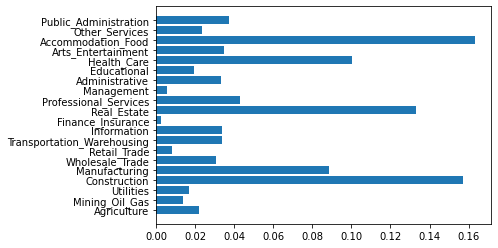

In [ ]:
rf = RandomForestClassifier(n_estimators=rs.best_params_['n_estimators'],max_leaf_nodes=rs.best_params_['max_leaf_nodes'])
rf.fit(df_std_train_X,df_std_train_Y)
plt.barh(df_std_train_X.columns, rf.feature_importances_)

In [ ]:
predicted_train = rf.predict(df_std_train_X)
print("In sample:",(df_std_train_Y.reset_index(drop=True)==predicted_train).mean())

predicted_test = rf.predict(df_std_test_X)
print("Out of sample:",(df_std_test_Y.reset_index(drop=True)==predicted_test).mean())

In sample: 0.6755725190839694
Out of sample: 0.584070796460177


In [ ]:
param_grid = {'n_estimators':range(1,51,5),'max_leaf_nodes': range(2,10)}
rf = RandomForestClassifier()
gs = GridSearchCV(rf,param_grid=param_grid)
rs = gs.fit(df_std2_train_X,df_std2_train_Y)
print(rs.best_params_)

{'max_leaf_nodes': 6, 'n_estimators': 26}


<BarContainer object of 20 artists>

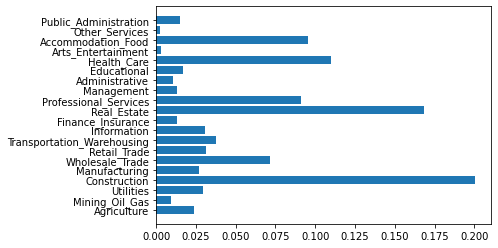

In [ ]:
rf = RandomForestClassifier(n_estimators=rs.best_params_['n_estimators'],max_leaf_nodes=rs.best_params_['max_leaf_nodes'])
rf.fit(df_std2_train_X,df_std2_train_Y)
rf.fit(df_std_train_X,df_std_train_Y)
plt.barh(df_std_train_X.columns, rf.feature_importances_)

In [ ]:
predicted_train = rf.predict(df_std2_train_X)
print("In sample:",(df_std2_train_Y.reset_index(drop=True)==predicted_train).mean())

predicted_test = rf.predict(df_std2_test_X)
print("Out of sample:",(df_std2_test_Y.reset_index(drop=True)==predicted_test).mean())

In sample: 0.40076335877862596
Out of sample: 0.4247787610619469


In [ ]:
param_grid = {'n_estimators':range(1,51,5),'max_leaf_nodes': range(2,10)}
rf = RandomForestClassifier()
gs = GridSearchCV(rf,param_grid=param_grid)
rs = gs.fit(df_std3_train_X,df_std3_train_Y)
print(rs.best_params_)

{'max_leaf_nodes': 7, 'n_estimators': 11}


<BarContainer object of 20 artists>

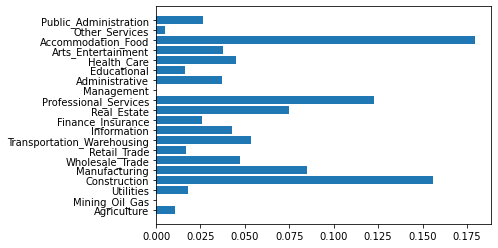

In [ ]:
rf = RandomForestClassifier(n_estimators=rs.best_params_['n_estimators'],max_leaf_nodes=rs.best_params_['max_leaf_nodes'])
rf.fit(df_std3_train_X,df_std3_train_Y)
rf.fit(df_std_train_X,df_std_train_Y)
plt.barh(df_std_train_X.columns, rf.feature_importances_)

In [ ]:
predicted_train = rf.predict(df_std3_train_X)
print("In sample:",(df_std3_train_Y.reset_index(drop=True)==predicted_train).mean())

predicted_test = rf.predict(df_std3_test_X)
print("Out of sample:",(df_std3_test_Y.reset_index(drop=True)==predicted_test).mean())

In sample: 0.4053030303030303
Out of sample: 0.4298245614035088
